In [13]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#1 

a) Detect the “skin-pixels” in a color image. Create a new binary image, the same size as the input
color image, in which the skin pixels are white (255) and all non-skin pixels are black (0).
Implement all the below described methods. (test images)

In [14]:
def SkinBGR(img):
    b = img[0]
    g = img[1]
    r = img[2]
    if r > 95 and g > 40 and b > 20 and (max(r,g,b) - min(r,g,b)) > 15 and abs(r-g) > 15 and r > g and r > b:
        return True
    return False

def SkinHSV(img):
    h = img[0]
    s = img[1]
    v = img[2]
    if h >= 0 and h <= 50 and s >=0.23*255 and s <=0.68*255 and v >= 0.35*255 and v <=1*255:
        return True
    return False

def SkinYCrCb(img):
    y = img[0]
    cr = img[1]
    cb = img[2]
    if y > 80 and cb > 85 and cb < 135 and cr > 125 and cr < 180:
        return True
    return False

def detect_skin(img, detectionFunction):
    rows, cols, layers = img.shape
    newImg = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            if detectionFunction(img[row][col]):
                newImg[row][col] = 255
            else:
                newImg[row][col] = 0
    return newImg

In [15]:
def apply_skin_detection(in_folder,out):
    for out_folder, function in [(f"{out}/HSV_Skin", SkinHSV), (f"{out}/YCrCb_Skin", SkinYCrCb), (f"{out}/BGR_Skin", SkinBGR)]: 
        if not os.path.exists(out_folder):
            os.makedirs(out_folder)

        images = [f for f in os.listdir(in_folder) if f.lower().endswith('.jpg')]
        for image in images:
            image_path = image
            image_name = os.path.basename(image_path)
            new_image_path = os.path.join(in_folder, image)
            image = cv.imread(new_image_path)
            if image is None:
                print(f"ERROR : can't load image {new_image_path}.")
                continue

            mask = detect_skin(image, function)
            out_path = os.path.join(out_folder, f"{image_name}")
            cv.imwrite(out_path, mask)
            print(f"Image processed {new_image_path} into {out_path}")

In [16]:
if __name__ == '__main__':
    input_folder = 'skin'

    apply_skin_detection(input_folder,input_folder)

Image processed skin\1.jpg into skin/HSV_Skin\1.jpg
Image processed skin\2.jpg into skin/HSV_Skin\2.jpg
Image processed skin\3.jpg into skin/HSV_Skin\3.jpg
Image processed skin\4.jpg into skin/HSV_Skin\4.jpg
Image processed skin\5.jpg into skin/HSV_Skin\5.jpg
Image processed skin\group.jpg into skin/HSV_Skin\group.jpg
Image processed skin\group2.jpg into skin/HSV_Skin\group2.jpg
Image processed skin\hands3.jpg into skin/HSV_Skin\hands3.jpg
Image processed skin\manwoman.jpg into skin/HSV_Skin\manwoman.jpg
Image processed skin\t26.jpg into skin/HSV_Skin\t26.jpg
Image processed skin\t27.jpg into skin/HSV_Skin\t27.jpg
Image processed skin\t63.jpg into skin/HSV_Skin\t63.jpg
Image processed skin\1.jpg into skin/YCrCb_Skin\1.jpg
Image processed skin\2.jpg into skin/YCrCb_Skin\2.jpg
Image processed skin\3.jpg into skin/YCrCb_Skin\3.jpg
Image processed skin\4.jpg into skin/YCrCb_Skin\4.jpg
Image processed skin\5.jpg into skin/YCrCb_Skin\5.jpg
Image processed skin\group.jpg into skin/YCrCb_Skin\

C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\598538485.py:5: RuntimeWarning: overflow encountered in scalar subtract
  if r > 95 and g > 40 and b > 20 and (max(r,g,b) - min(r,g,b)) > 15 and abs(r-g) > 15 and r > g and r > b:


Image processed skin\1.jpg into skin/BGR_Skin\1.jpg
Image processed skin\2.jpg into skin/BGR_Skin\2.jpg
Image processed skin\3.jpg into skin/BGR_Skin\3.jpg
Image processed skin\4.jpg into skin/BGR_Skin\4.jpg
Image processed skin\5.jpg into skin/BGR_Skin\5.jpg
Image processed skin\group.jpg into skin/BGR_Skin\group.jpg
Image processed skin\group2.jpg into skin/BGR_Skin\group2.jpg
Image processed skin\hands3.jpg into skin/BGR_Skin\hands3.jpg
Image processed skin\manwoman.jpg into skin/BGR_Skin\manwoman.jpg
Image processed skin\t26.jpg into skin/BGR_Skin\t26.jpg
Image processed skin\t27.jpg into skin/BGR_Skin\t27.jpg
Image processed skin\t63.jpg into skin/BGR_Skin\t63.jpg


b)
Evaluate the below described methods by using the Pratheepan dataset. For the images in this
dataset the “ground truth” information is provided. Compute and display the confusion matrix
and the accuracy. The confusion matrix has the following form:


In [50]:
TRUE_POSITIVE = 0
FALSE_NEGATAIVE = 1
FALSE_POSITIVE = 2
TRUE_NEGATIVE = 3

def addConfusion(groundImg, resultImg, confusion):
    rows, cols = resultImg.shape
    for row in range(rows):
        for col in range(cols):
            if groundImg[row][col] == 255 and resultImg[row][col] == 255:
                confusion[TRUE_POSITIVE] += 1
            if groundImg[row][col] == 255 and resultImg[row][col] == 0:
                confusion[FALSE_NEGATAIVE] += 1
            if groundImg[row][col] == 0 and resultImg[row][col] == 255:
                confusion[FALSE_POSITIVE] += 1
            else:
                confusion[TRUE_NEGATIVE] += 1
    return confusion

def displayConfusion(confusion):
    tp = confusion[TRUE_POSITIVE]
    fp = confusion[FALSE_POSITIVE]
    fn = confusion[FALSE_NEGATAIVE]
    tn = confusion[TRUE_NEGATIVE]

    total = tp + fp + fn + tn
    if total != 0:
        acc = (tp + tn) / total
    else:
        acc = 0

    print("TRUE POSITIVES:", tp)
    print("FALSE POSITIVES:", fp)
    print("FALSE NEGATIVES:", fn)
    print("TRUE NEGATIVES:", tn)
    print("ACCURACY:", acc)
    print()
    
    return acc  

In [56]:
confusion_matrices = {
        "HSV_Skin": [0, 0, 0, 0],
        "YCrCb_Skin": [0, 0, 0, 0],
        "BGR_Skin": [0, 0, 0, 0]
    }

def process_images(ground_truth_folder, in_folder, function_pairs):

    ground_truth_images = [f for f in os.listdir(ground_truth_folder) if f.lower().endswith('.png')]
    # print(ground_truth_images)
    for image_name in ground_truth_images:
        ground_image_path = os.path.join(ground_truth_folder, image_name)
        ground_img = cv.imread(ground_image_path, cv.IMREAD_GRAYSCALE)

        if ground_img is not None:
            for out_folder, function in function_pairs:
                # print(f"IMAGE NAME : {image_name}")
                name, ext = os.path.splitext(image_name)

                new_image_name = name + ".jpg"
                result_img_path = os.path.join(in_folder, out_folder, f"{new_image_name}")
                result_img = cv.imread(result_img_path, cv.IMREAD_GRAYSCALE)

                if result_img is not None:
                    confusion_matrices[out_folder] = addConfusion(ground_img, result_img, confusion_matrices[out_folder])
        #         else:
        #             print('NASOL nu am imag asta')
        # else:
        #     print("NASOl - Nu e ground Truth")



In [57]:
def plot_confusion_matrix(confusion, accuracy, title='Confusion Matrix'):
    labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    cm = np.array(confusion).reshape(2, 2)
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')

    fig.colorbar(cax)

    ax.set_xticklabels(['', 'Negative', 'Positive'])
    ax.set_yticklabels(['', 'Negative', 'Positive'])

    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, str(val), ha='center', va='center', color='white', fontsize=12)

    ax.set_title(f'{title} (Accuracy: {accuracy*100:.2f}%)')

    plt.xlabel('Predicted')
    plt.ylabel('Ground Truth')
    plt.show()


Results for HSV_Skin:
TRUE POSITIVES: 63895
FALSE POSITIVES: 65834
FALSE NEGATIVES: 1360487
TRUE NEGATIVES: 5770993
ACCURACY: 0.8035697636578151



C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\3215135338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Negative', 'Positive'])
C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\3215135338.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Negative', 'Positive'])


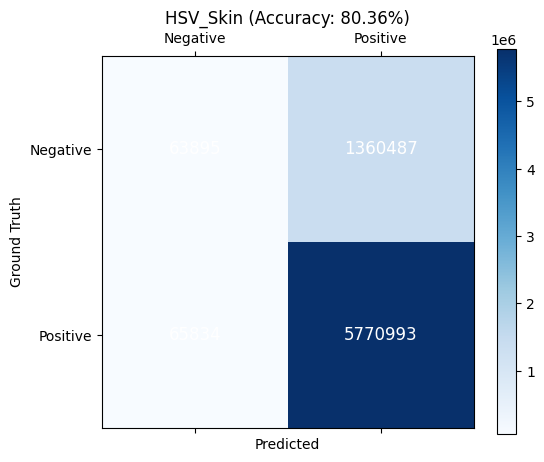

Results for YCrCb_Skin:
TRUE POSITIVES: 56
FALSE POSITIVES: 42676
FALSE NEGATIVES: 1539711
TRUE NEGATIVES: 5794151
ACCURACY: 0.7854854150845227



C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\3215135338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Negative', 'Positive'])
C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\3215135338.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Negative', 'Positive'])


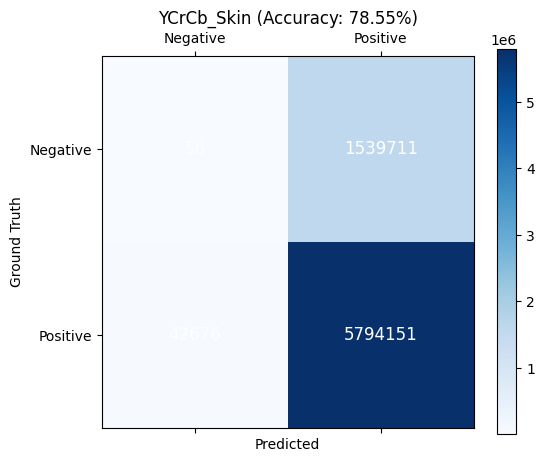

Results for BGR_Skin:
TRUE POSITIVES: 1310434
FALSE POSITIVES: 1023835
FALSE NEGATIVES: 120062
TRUE NEGATIVES: 4812992
ACCURACY: 0.8425971984457



C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\3215135338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Negative', 'Positive'])
C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\3215135338.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Negative', 'Positive'])


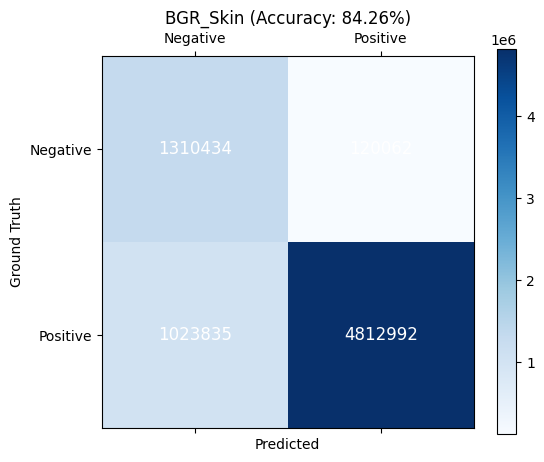

In [58]:
if __name__ == "__main__":
    
    # input_folder = r"Pratheepan_Dataset\FacePhoto"
    # apply_skin_detection(input_folder, input_folder)

    # input_folder = r"Pratheepan_Dataset\FamilyPhoto"
    # apply_skin_detection(input_folder, input_folder)
    
    function_pairs = [
        ("HSV_Skin", SkinHSV),
        ("YCrCb_Skin", SkinYCrCb),
        ("BGR_Skin", SkinBGR)
    ]

    process_images(r"Ground_Truth/GroundT_FacePhoto", r"Pratheepan_Dataset\FacePhoto", function_pairs)
    process_images(r"Ground_Truth/GroundT_FacePhoto", r"Pratheepan_Dataset\FamilyPhoto", function_pairs)


    for folder, confusion in confusion_matrices.items():
        print(f"Results for {folder}:")
        accuracy = displayConfusion(confusion)
        plot_confusion_matrix(confusion, accuracy, folder)
                              

    c)Use skin pixel classification to detect the face in a portrait image (find a minimal square that
    frames the human face). Do not use an already implemented face detection function. 

In [59]:
import copy

def isSkinBGR(image):
    b = image[0]
    g = image[1]
    r = image[2]
    if r > 95 and g > 40 and b > 20 and (max(r,g,b) - min(r,g,b)) > 15 and abs(r-g) > 15 and r > g and r > b:
        return True
    return False

def isSkinBGRLateralLight(image):
    b = image[0]
    g = image[1]
    r = image[2]
    if r > 220 and g > 210 and b > 170 and abs(r - g) <= 15 and r > b and g > b:
        return True
    return False

def BGR2YCrCb(image):
    b = image[0]
    g = image[1]
    r = image[2]
    y = 0.299*r + 0.587*g + 0.114*b
    cb = - 0.1687*r - 0.3313*g + 0.5*b + 128
    cr = 0.5 * r -0.4187 * g - 0.0813 * b + 128
    return [y, cr, cb]

def isSkinCrCb(image):
    y = image[0]
    cr = image[1]
    cb = image[2]
    if cr <= (1.5862 * cb + 20) and cr >= (0.3448 * cb + 76.2069) and cr >= (-4.5652 * cb + 234.5652) and cr <= (-1.15 * cb + 301.75) and cr <= (-2.2857 * cb + 432.85):
        return True
    return False

def isSkinH(image):
    h = image[0]
    s = image[1]
    v = image[2]
    if h < 25 or h > 230:
        return True
    return False

def isSkinBGRHCrCb(image):
    bgrPixel = image
    auxPixelImg = np.uint8([[image]])
    hsvPixel = cv.cvtColor(auxPixelImg, cv.COLOR_BGR2HSV)[0][0]
    ycrcbPixel = BGR2YCrCb(image)

    if (isSkinBGR(bgrPixel) or isSkinBGRLateralLight(bgrPixel)) and isSkinCrCb(ycrcbPixel) and isSkinH(hsvPixel):
        return True
    return False

def process_images(inputImg):
    img = copy.deepcopy(inputImg)
    outputImg = copy.deepcopy(img)
    rows, cols, layers = img.shape
    for i in range(rows):
        for j in range(cols):
            if isSkinBGRHCrCb(img[i][j]) == False:
                img[i][j] = [0, 0, 0]
    kernelDilate = np.ones((rows//200,cols//200),np.uint8)
    kernelOpen = np.ones((rows//200,cols//200),np.uint8)

    img = cv.dilate(img,kernelDilate,iterations = 1)
    img = cv.GaussianBlur(img,(5,5),0)
    img = cv.morphologyEx(img, cv.MORPH_OPEN, kernelOpen)


    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, thresholded = cv.threshold(gray, 50, 240, cv.THRESH_BINARY)

    contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if len(contour) >= 5:
            x, y, w, h = cv.boundingRect(contour)
            ellipse = cv.fitEllipse(contour)
            (center, axes, angle) = ellipse
            major_axis_length = max(axes)
            minor_axis_length = min(axes)
            axis_ratio = minor_axis_length / major_axis_length
            if w / h <1 and w / h >0.4 and axis_ratio < 0.9 and axis_ratio > 0.3 and h > rows // 64:
                cv.rectangle(outputImg, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return outputImg


In [65]:
from pathlib import Path

if __name__=="__main__": #mai e asta de rezolvat

    skinPath = Path("skin")
    facePath = Path("Pratheepan_Dataset") / "FacePhoto"
    familyPath = Path("Pratheepan_Dataset") / "FamilyPhoto"
    detectedFacesPath = Path("Detected_Faces")

    detectedFacesPath.mkdir(parents=True, exist_ok=True)

    skinFiles = list(skinPath.iterdir())
    faceFiles = list(facePath.iterdir())
    familyFiles = list(familyPath.iterdir())

    filePaths = skinFiles + faceFiles + familyFiles

    for filePath in filePaths:
        img = cv.imread(str(filePath))

        fileName = filePath.name

        if img is not None:
            outputImg = process_images(img)
            outputPath = detectedFacesPath / fileName
            cv.imwrite(str(outputPath), outputImg)
        # else:
        #     print(f"Nu s-a putut citi fișierul: {filePath}")


C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\4240238176.py:15: RuntimeWarning: overflow encountered in scalar subtract
  if r > 220 and g > 210 and b > 170 and abs(r - g) <= 15 and r > b and g > b:
C:\Users\lucas\AppData\Local\Temp\ipykernel_2052\4240238176.py:7: RuntimeWarning: overflow encountered in scalar subtract
  if r > 95 and g > 40 and b > 20 and (max(r,g,b) - min(r,g,b)) > 15 and abs(r-g) > 15 and r > g and r > b:


Nu s-a putut citi fișierul: skin\BGR_Skin
Nu s-a putut citi fișierul: skin\HSV_Skin
Nu s-a putut citi fișierul: skin\YCrCb_Skin
Nu s-a putut citi fișierul: Pratheepan_Dataset\FacePhoto\BGR_Skin
Nu s-a putut citi fișierul: Pratheepan_Dataset\FacePhoto\HSV_Skin
Nu s-a putut citi fișierul: Pratheepan_Dataset\FacePhoto\YCrCb_Skin
Nu s-a putut citi fișierul: Pratheepan_Dataset\FamilyPhoto\BGR_Skin
Nu s-a putut citi fișierul: Pratheepan_Dataset\FamilyPhoto\HSV_Skin
Nu s-a putut citi fișierul: Pratheepan_Dataset\FamilyPhoto\YCrCb_Skin
